In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

# 1. Read the three csv files which contains the score of same students in term1 for each Subject

In [32]:
m = pd.read_csv('MathScoreTerm1.csv')
d = pd.read_csv('DSScoreTerm1.csv')
p = pd.read_csv('PhysicsScoreTerm1.csv')

# 2. Convert ethnicity to numerical value
2. Remove the name and ethnicity column (to ensure confidentiality) - ignored

In [33]:
#m['Ethinicity']=np.where(m['Ethinicity']=="White American",1,np.where(m['Ethinicity']=="European American",2,np.where(m['Ethinicity']=="Hispanic",3,4)))

In [34]:
#d['Ethinicity']=np.where(d['Ethinicity']=="White American",1,np.where(d['Ethinicity']=="European American",2,np.where(d['Ethinicity']=="Hispanic",3,4)))

In [35]:
#p['Ethinicity']=np.where(p['Ethinicity']=="White American",1,np.where(p['Ethinicity']=="European American",2,np.where(p['Ethinicity']=="Hispanic",3,4)))

In [36]:
m1 = m.drop(['Name'],axis = 1)

In [37]:
d1 = d.drop(['Name'],axis = 1)

In [38]:
p1 = p.drop(['Name'],axis = 1)

In [39]:
#m1.describe().transpose()
#d1.describe().transpose()
#p1.describe().transpose()
#m1['Score'].isnull().sum()
#d1['Score'].isnull().sum()
#p1['Score'].isnull().sum()

# 3. Fill the missing score for a student to the average of the class
3. Fill missing score data with zero - ignore

In [40]:
a = m1['Score'].mean()
a

74.3489932885906

In [41]:
b = d1['Score'].mean()
b

68.36717428087987

In [42]:
c = p1['Score'].mean()
c

70.59865092748736

In [43]:
#m1['Score'].replace(np.nan,0, inplace= True)
m1['Score'].replace(a,0, inplace= True)

In [44]:
#m1[m1['Score']==0]

In [45]:
#d1['Score'].replace(np.nan,0, inplace= True)
d1['Score'].replace(b,0, inplace= True)

In [46]:
#d1[d1['Score']==0]

In [47]:
#p1['Score'].replace(np.nan,0, inplace= True)
p1['Score'].replace(c,0, inplace= True)

In [48]:
#p1[p1['Score']==c]

# 4. Merge the three files

In [49]:
mdpdata = m1.append([d1,p1])

In [50]:
mdpdata['Subject'].unique()

array(['Maths', 'Data Structue', 'Physics'], dtype=object)

# 5. Change Sex(M/F) Column to 1/2 for further analysis

In [51]:
mdpdata['Sex']=np.where(mdpdata['Sex']=="M",1,2)

In [52]:
columnsTitles = ['ID', 'Sex', 'Age','Ethinicity','Score','Subject']
ScoreFinal = mdpdata.reindex(columns=columnsTitles)

In [53]:
#ScoreFinal.to_csv('ScoreFinal.csv')

Text(0.5,1,'Subject Score Status')

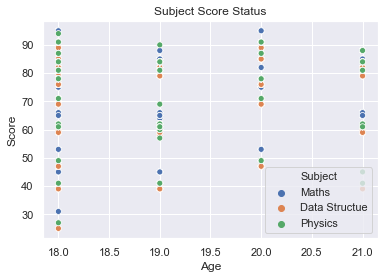

In [54]:
sns.set()
sns.scatterplot(x=ScoreFinal['Age'],y=ScoreFinal['Score'],hue=ScoreFinal["Subject"])
plt.title('Subject Score Status')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Ethinicity Score Status')

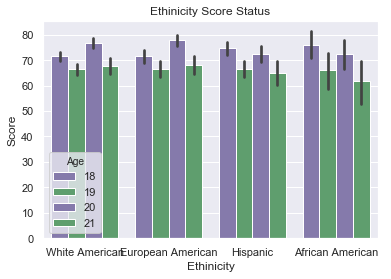

In [55]:
sns.barplot(x=ScoreFinal['Ethinicity'],y=ScoreFinal['Score'],hue=ScoreFinal['Age'],data=ScoreFinal,palette=["m", "g"],color=".25")
plt.title('Ethinicity Score Status')

Text(0.5,1,'Sex Score Status')

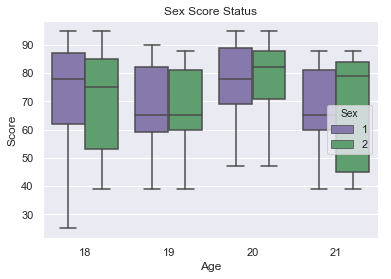

In [56]:
sns.boxplot(x=ScoreFinal['Age'],y=ScoreFinal['Score'],hue=ScoreFinal['Sex'],data=ScoreFinal,palette=["m", "g"],color=".25")
plt.title('Sex Score Status')

Text(0.5,1,'Correlation between Age,Score and Sex')

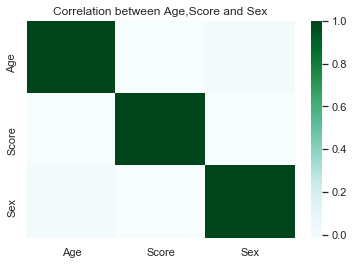

In [57]:
#ScoreFinal[['Age','Score','Sex']].corr()
sns.heatmap(ScoreFinal[['Age','Score','Sex']].corr(), cmap='BuGn')
plt.title('Correlation between Age,Score and Sex')

Text(0.5,1,'Gender Wise Age and Score Status')

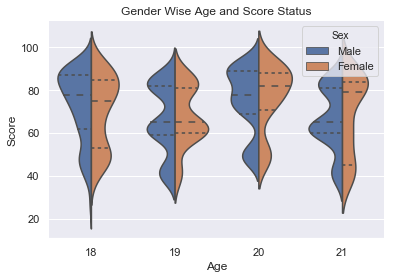

In [58]:
ScoreFinal['Sex']=np.where(mdpdata['Sex']==1,"Male","Female")
sns.violinplot(x="Age", y="Score", hue="Sex",split=True, inner="quart",data=ScoreFinal)
sns.despine(left=True)
plt.title('Gender Wise Age and Score Status')

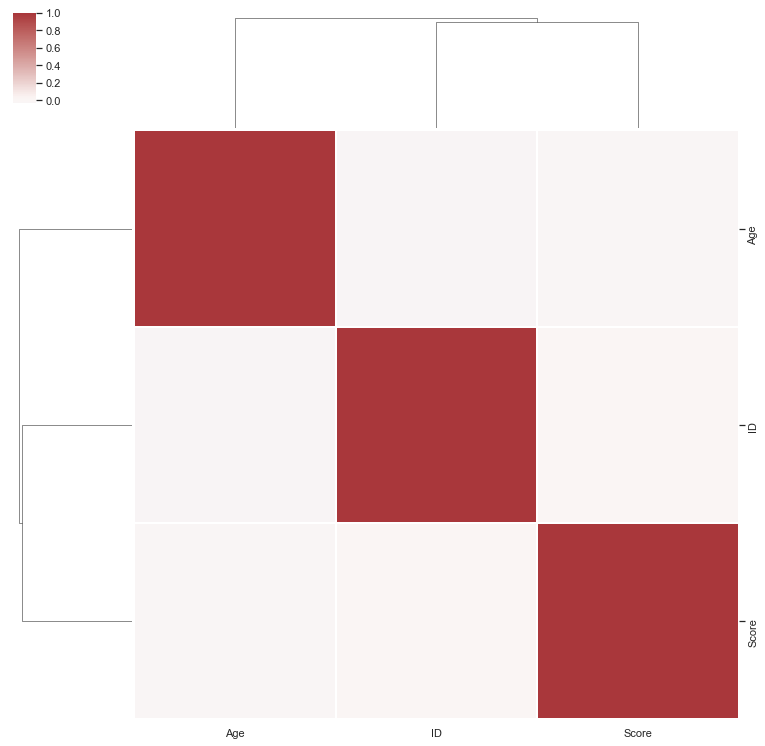

In [59]:
sns.clustermap(ScoreFinal.corr(), center=0, cmap="vlag",linewidths=.75, figsize=(13, 13))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


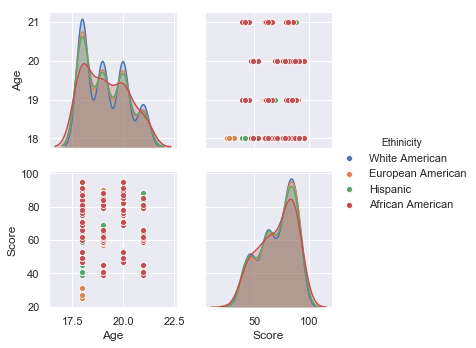

In [60]:
sns.pairplot(ScoreFinal[['Age','Score','Ethinicity']],hue = "Ethinicity")